# Merge results from auto-processing for evaluating behavior

## Test with BB = 0 --> 0.5 Hz, and HF = 0.5 --> 1 Hz
I don't see substantial differences at the moment

In [1]:
from rtergpy.run import defaults, event
import matplotlib.pyplot as plt
import numpy as np
import os

Defaults=defaults()
Event=event()
print(os.getcwd())

/Users/anewman/Documents/Projects/rterg/processing/notebooks


In [2]:
os.chdir('../Examples')

In [3]:
import pandas as pd
runs=pd.read_pickle('Results_2000-late2021.01.pkl')

## check whether errors reduce for new bands

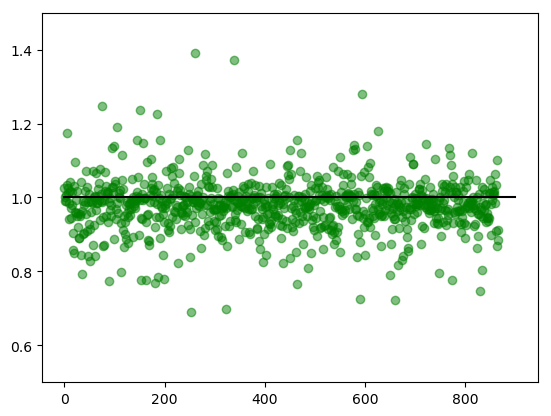

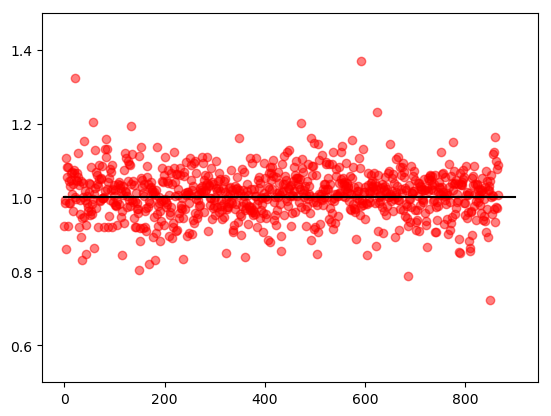

0.98078007844905868

In [44]:
runs00=pd.read_pickle('Results_2000-late2021.pkl')

# BB

plt.plot(runs['STD10(corr)']/runs00['STD10(corr)'],'go',alpha=0.5)
x=np.linspace(0,900)
y=np.ones(len(x))
#plt.xlabel('Original BB (300 - 0.5 s) log10 Error')
#plt.ylabel('Revised BB (300 - 2 s) log10 Error')
plt.plot(x,y,'k-')
plt.ylim(0.5,1.5)
plt.show()

# HF
plt.plot(runs['STD10(hfcorr)']/runs00['STD10(hfcorr)'],'ro',alpha=0.5)
x=np.linspace(0,900)
y=np.ones(len(x))
#plt.xlabel('Original BB (300 - 0.5 s) log10 Error')
#plt.ylabel('Revised BB (300 - 2 s) log10 Error')
plt.plot(x,y,'k-')
plt.ylim(0.5,1.5)
plt.show()
np.mean(runs['STD10(corr)']/runs00['STD10(corr)'])


In [37]:
x

array([ 0.        ,  0.01530612,  0.03061224,  0.04591837,  0.06122449,
        0.07653061,  0.09183673,  0.10714286,  0.12244898,  0.1377551 ,
        0.15306122,  0.16836735,  0.18367347,  0.19897959,  0.21428571,
        0.22959184,  0.24489796,  0.26020408,  0.2755102 ,  0.29081633,
        0.30612245,  0.32142857,  0.33673469,  0.35204082,  0.36734694,
        0.38265306,  0.39795918,  0.41326531,  0.42857143,  0.44387755,
        0.45918367,  0.4744898 ,  0.48979592,  0.50510204,  0.52040816,
        0.53571429,  0.55102041,  0.56632653,  0.58163265,  0.59693878,
        0.6122449 ,  0.62755102,  0.64285714,  0.65816327,  0.67346939,
        0.68877551,  0.70408163,  0.71938776,  0.73469388,  0.75      ])

In [27]:
pd.set_option('max_columns', None)  # show all columns
#runs.tail()

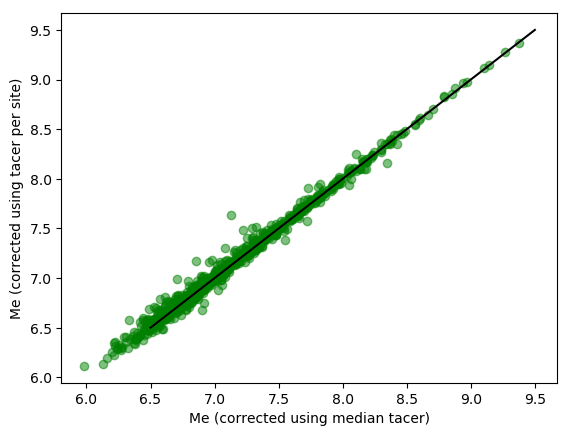

In [5]:
# compare Me by median tacer vs. individual
plt.plot(runs['Me(corr)'],runs['Me(corrper)'],'go',alpha=0.5)
x=np.linspace(6.5,9.5)
plt.xlabel('Me (corrected using median tacer)')
plt.ylabel('Me (corrected using tacer per site)')
plt.plot(x,x,'k-')
plt.show()

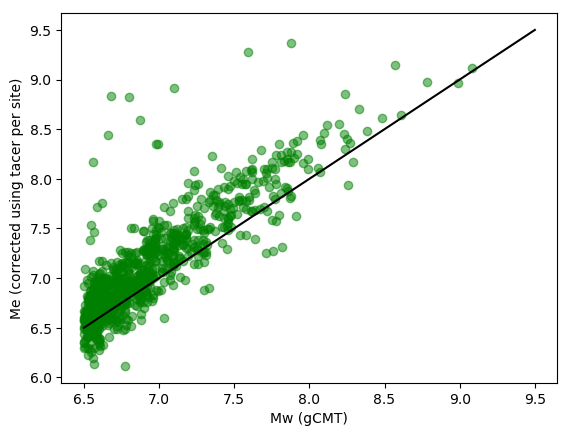

In [6]:
# compare Me by median tacer vs. individual
plt.plot(runs['Mw'],runs['Me(corrper)'],'go',alpha=0.5)
x=np.linspace(6.5,9.5)
plt.xlabel('Mw (gCMT)')
plt.ylabel('Me (corrected using tacer per site)')
plt.plot(x,x,'k-')
plt.show()

In [7]:
import plotly.express as px
import plotly.graph_objects as go
runs['edepth']=runs['edepth'].astype(float)
fig = px.scatter(runs, x='Mw', y='Me(per)',color='edepth', size='tacer', hover_data=['eventname','CMTNAME'], 
                 color_continuous_scale=px.colors.sequential.Turbo)
fig.add_trace(go.Scatter(x=x,y=x,mode='lines',name='unity'))
fig.update_layout(width=1000,height=800)
fig.show()

# many of the high outliers seem to be events within an hour of a prior one.  need to seperate and ID.


In [8]:
import plotly.express as px
import plotly.graph_objects as go
runs['Mw']=runs['Mw'].astype(float)
runs['']=runs['edepth'].astype(float)
runs['tacer^3']=runs['tacer'].astype(float)**3

fig = px.scatter(runs, y='Me(corrper)', x='tacer^3',color='edepth', size='Mw', hover_data=['eventname','CMTNAME'], 
                 log_x=True, color_continuous_scale=px.colors.sequential.Turbo)
#fig.add_trace(go.Scatter(x=x,y=x,mode='lines',name='unity'))
fig.update_layout(width=1000,height=800)

# create a cleaned version for events without immediately before


In [14]:
mintime=2*60*60  # 2 hours
runsclean=runs.copy()
drops=[]
for i in range(len(runs)):
    if i >= 1:
        if runs.etime[i]-runs.etime[i-1]<mintime:
            #print(i)
            drops.append(i)

runsclean.drop(index=drops, inplace=True)
runsclean=runsclean.reset_index()
len(drops)

49

In [15]:
import plotly.express as px
import plotly.graph_objects as go
runsclean['edepth']=runsclean['edepth'].astype(float)
fig = px.scatter(runsclean, x='Mw', y='Me(per)',color='edepth', size='tacer', hover_data=['eventname','CMTNAME'], 
                 color_continuous_scale=px.colors.sequential.Turbo)
fig.add_trace(go.Scatter(x=x,y=x,mode='lines',name='unity'))
fig.update_layout(width=1000,height=800)
fig.show()

In [16]:
focmechs=pd.DataFrame(runsclean['focmech'].to_list(), columns = ['strike', 'dip', 'rake'])
runsclean.insert(44, 'strike', focmechs['strike'],True)
runsclean.insert(45, 'dip', focmechs['dip'],True)
runsclean.insert(46, 'rake', focmechs['rake'],True)

In [19]:
import plotly.express as px
import plotly.graph_objects as go
runsclean['rake']=90-np.abs(np.abs(runsclean['rake'].astype(float))-90)
fig = px.scatter(runsclean, x='Me(corr)', y='Me(medtac)',color='rake', size='tacer', 
                 hover_data=['eventname','CMTNAME','focmech','Mw'], 
                 color_continuous_scale=px.colors.sequential.Turbo)
fig.add_trace(go.Scatter(x=x,y=x,mode='lines',name='unity'))
fig.update_layout(width=1000,height=800)
fig.show()

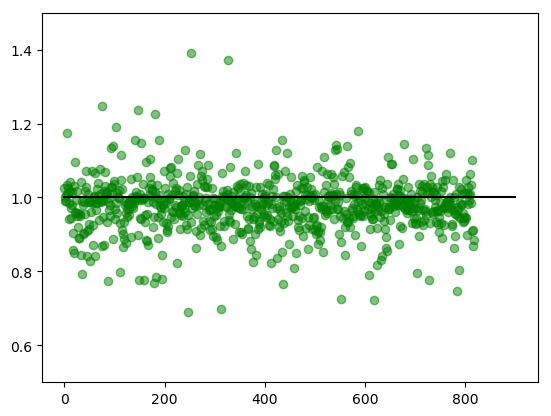

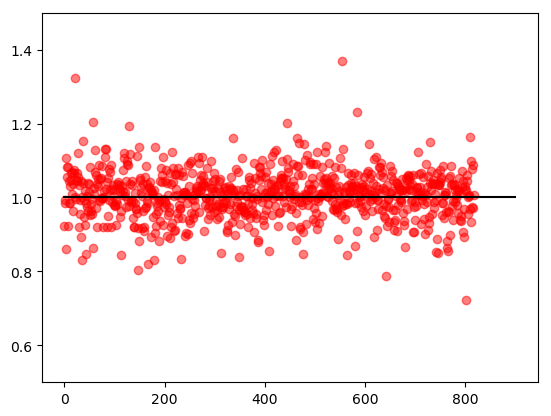

1.0071346754697077

In [46]:
runs00=pd.read_pickle('Results_2000-late2021.pkl')
mintime=2*60*60  # 2 hours
runsclean00=runs00.copy()
drops=[]
for i in range(len(runs)):
    if i >= 1:
        if runs00.etime[i]-runs00.etime[i-1]<mintime:
            #print(i)
            drops.append(i)

runsclean00.drop(index=drops, inplace=True)
runsclean00=runsclean00.reset_index()
len(drops)
# BB

plt.plot(runsclean['STD10(corr)']/runsclean00['STD10(corr)'],'go',alpha=0.5)
x=np.linspace(0,900)
y=np.ones(len(x))
#plt.xlabel('Original BB (300 - 0.5 s) log10 Error')
#plt.ylabel('Revised BB (300 - 2 s) log10 Error')
plt.plot(x,y,'k-')
plt.ylim(0.5,1.5)
plt.show()

# HF
plt.plot(runsclean['STD10(hfcorr)']/runsclean00['STD10(hfcorr)'],'ro',alpha=0.5)
x=np.linspace(0,900)
y=np.ones(len(x))
#plt.xlabel('Original BB (300 - 0.5 s) log10 Error')
#plt.ylabel('Revised BB (300 - 2 s) log10 Error')
plt.plot(x,y,'k-')
plt.ylim(0.5,1.5)
plt.show()
np.mean(runsclean['STD10(hfcorr)']/runsclean00['STD10(hfcorr)'])